In [1]:
import os
import cv2 
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
%matplotlib inline

In [138]:
# mounting a drive
drive.mount('/content/drive')

# display images in a row
def showInRow(list_of_images, titles = None, disable_ticks = False):
  plt.rcParams["figure.figsize"] = (15, 10)
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

# function to load images from the connected drive
def load_images(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        # read the image
        img = plt.imread(os.path.join(folder,filename))
        # if colored turn to grayscale
        if len(img.shape) == 3:
          gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
          gray = img
        # if image is processed correctly
        if img is not None:
            images.append(img)
    return images

# function to save images
def save_images(images,folder):
    for i, image in enumerate(images):
        print('{}/{}.jpg'.format(folder, i))
        cv2.imwrite('{}/{}.jpg'.format(folder, i),image)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# load images from all 4 datasets into separate arrays
path = "drive/MyDrive/Alzheimer_s Dataset/train/"

# get only 2000 images for experiment purposes
healthy =load_images(path + "NonDemented")[:2000]
print("Healthy images: {}".format(len(healthy)))

mild =load_images(path + "MildDemented")
print("Mild images: {}".format(len(mild)))

moderate =load_images(path + "ModerateDemented")
print("Moderate images: {}".format(len(moderate)))

verymild =load_images(path + "VeryMildDemented")
print("VeryMild images: {}".format(len(verymild)))

# create a train and healthy array 
X_train = np.array(healthy + mild + moderate + verymild)
y_train = np.array([0]*len(healthy) + [1]*len(mild) + [2]*len(moderate) + [3]*len(verymild))

Healthy images: 2000
Mild images: 717
Moderate images: 52
VeryMild images: 1792


## SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,k_neighbors=10)
# upsampling all to 4000
nsamples, nx, ny = X_train.shape 
X_smote, y_smote = sm.fit_resample(X_train.reshape((nsamples,nx*ny)), y_train)

In [31]:
X_smote_aug = X_smote.reshape(8000, nx, ny)

healthy_aug = []
mild_aug = []
moderate_aug = []
verymild_aug = []

# arrage images into respective folders
for i, label in enumerate(y_smote):
  if label==0:
    healthy_aug.append(X_smote_aug[i])
  elif label==1:
    mild_aug.append(X_smote_aug[i])
  elif label==2:
    moderate_aug.append(X_smote_aug[i])
  elif label==3:
    verymild_aug.append(X_smote_aug[i])

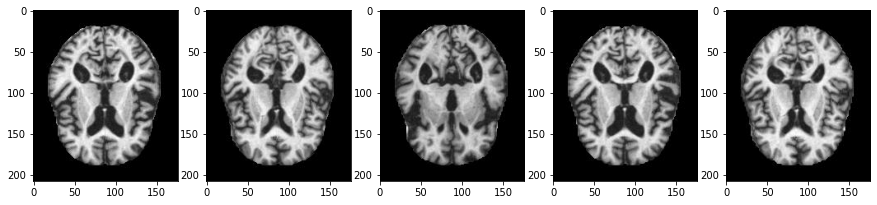

In [29]:
showInRow(moderate_aug[10:15])

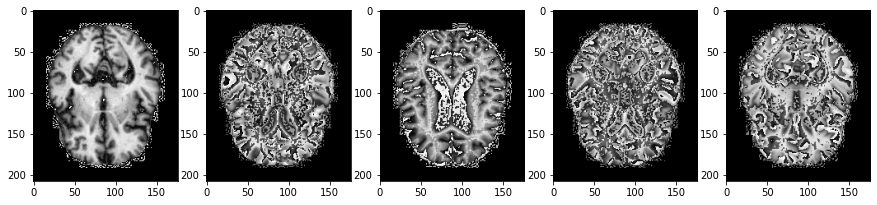

In [32]:
# not accepted result
showInRow(moderate_aug[1000:1005])

## ALBUMENTATION

In [130]:
# Albumentations
import albumentations as A

def augment_album(images):
  
  transform = A.Compose([
  A.GridDistortion(p=1, border_mode=1, distort_limit=0.15),
  A.RandomBrightnessContrast(p=0.7, brightness_limit=[0,0.5]),
  A.Blur(p=0.5)
  ])
  M = len(images)
  images_aug = images
  N = 2000-len(images)
  i=0

  while i < N:
    transformed = transform(image=images[i%M])
    images_aug.append((transformed["image"]).astype(np.uint8))
    i+=1
  return images_aug

# Healthy images: 2000
# Mild images: 717
# Moderate images: 52
# VeryMild images: 1792

# mild images
mild_aug = augment_album(mild)

# moderate images
moderate_aug = augment_album(moderate)

# verymild images
verymild_aug = augment_album(verymild)


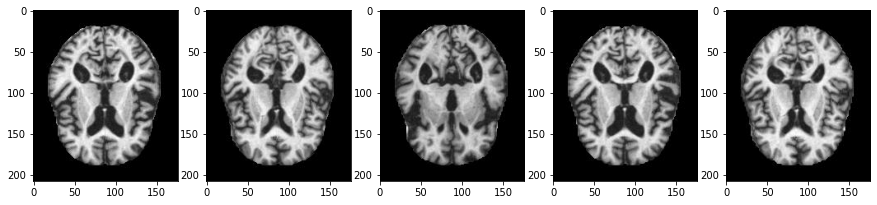

In [140]:
# initial images
showInRow(moderate[10:15])

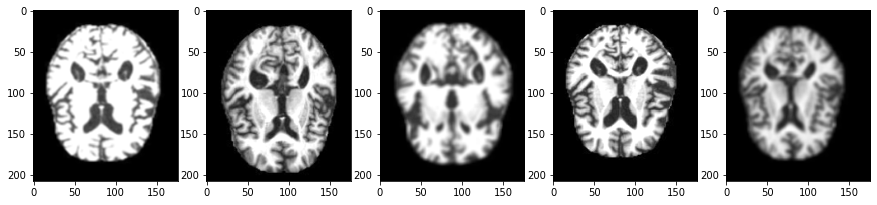

In [142]:
# initial images
showInRow(moderate[62:67])

In [139]:
# save images from all 4 datasets into separate arrays
path = "drive/MyDrive/Alzheimer_s Dataset Albumentation/train/"

save_images(healthy,path + "NonDemented")
save_images(mild_aug,path + "MildDemented")
save_images(moderate_aug,path + "ModerateDemented")
save_images(verymild_aug,path + "VeryMildDemented")

Streaming output truncated to the last 5000 lines.
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1000.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1001.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1002.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1003.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1004.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1005.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1006.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1007.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1008.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1009.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1010.jpg
drive/MyDrive/Alzheimer_s Dataset Albumentation/train/MildDemented/1011.jpg
drive/MyDrive/Alzheimer_s Dataset Alb